# Tracking the Sun
This is a simple tutorial on tracking the position of the Sun in the sky on a given day from the NKU campus.

In [1]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
from astropy.time import Time
import astropy.coordinates as coord
import astropy.units as u

%matplotlib inline

## Set your location
You can set the value by hand (I used the values for Highland Heights: https://en.wikipedia.org/wiki/Highland_Heights,_Kentucky) or you can use an address lookup.

In [2]:
longitude = -84.455851*u.deg #Longitudes are always East (this is a Western longitude thus it is negative)
latitude = 39.040035*u.deg #the deg stands for degress
height = 260*u.m #Height above Sea Level
observing_location = coord.EarthLocation(lat=latitude, lon=longitude, height=height) #This is a location object
print("({},{}), height: {:.1f}".format(observing_location.lon,observing_location.lat,observing_location.height))

(-84.455851 deg,39.040035 deg), height: 260.0 m


In [3]:
observing_location2 = coord.EarthLocation.of_address('Northern Kentucky University')
print("({},{}), height: {:.1f}".format(observing_location2.lon,observing_location2.lat,observing_location2.height))

(-84.46595983085443 deg,39.0346853 deg), height: 0.0 m


## Set your Date and Time
The easiste format is YYYY-MM-DDTHH:MM:SS

In [4]:
stringtime1 = '2023-05-09T16:30:01' #this is in UTC. So Cincinnati is UT -4 while in EDT 12:30:01 local time
time1 = Time(stringtime1,format="isot") #This is a time object
time1

<Time object: scale='utc' format='isot' value=2023-05-09T16:30:01.000>

## Where is the Sun in the Sky?
We will first get the Right Ascension and Declination for the Sun. This is equivalent to Longitude and Latitude, but for the sky.

In [5]:
sun_radec = coord.get_sun(time1)
print("Right Ascension: {} Declination: {}".format(sun_radec.ra,sun_radec.dec))

Right Ascension: 46.01636133298077 deg Declination: 17.323025623249286 deg


## Now let's get an Altitude and Azimuth for our location
The actual position of the sun in the sky is a function of both time and location, both because the Sun moves in the sky, and the sky moves as the Earth rotates.

In [6]:
aa_frame = coord.AltAz(location=observing_location, obstime=time1)
sun_altaz = sun_radec.transform_to(aa_frame)
print("Azimuth: {:.5f} Altitude: {:.5f}".format(sun_altaz.az,sun_altaz.alt))

Azimuth: 142.57958 deg Altitude: 64.24493 deg


## Now let's watch the Sun go over the whole day from 5:00 am to 10:00pm local time

In [7]:
starttime = Time('2023-05-09T09:00:00',format='isot')
time_arr = starttime + np.linspace(0, 17, 69)*u.hour #Get a point every 15 minutes
local_time_arr = time_arr - 4*u.hour
print(local_time_arr) 

['2023-05-09T05:00:00.000' '2023-05-09T05:15:00.000'
 '2023-05-09T05:30:00.000' '2023-05-09T05:45:00.000'
 '2023-05-09T06:00:00.000' '2023-05-09T06:15:00.000'
 '2023-05-09T06:30:00.000' '2023-05-09T06:45:00.000'
 '2023-05-09T07:00:00.000' '2023-05-09T07:15:00.000'
 '2023-05-09T07:30:00.000' '2023-05-09T07:45:00.000'
 '2023-05-09T08:00:00.000' '2023-05-09T08:15:00.000'
 '2023-05-09T08:30:00.000' '2023-05-09T08:45:00.000'
 '2023-05-09T09:00:00.000' '2023-05-09T09:15:00.000'
 '2023-05-09T09:30:00.000' '2023-05-09T09:45:00.000'
 '2023-05-09T10:00:00.000' '2023-05-09T10:15:00.000'
 '2023-05-09T10:30:00.000' '2023-05-09T10:45:00.000'
 '2023-05-09T11:00:00.000' '2023-05-09T11:15:00.000'
 '2023-05-09T11:30:00.000' '2023-05-09T11:45:00.000'
 '2023-05-09T12:00:00.000' '2023-05-09T12:15:00.000'
 '2023-05-09T12:30:00.000' '2023-05-09T12:45:00.000'
 '2023-05-09T13:00:00.000' '2023-05-09T13:15:00.000'
 '2023-05-09T13:30:00.000' '2023-05-09T13:45:00.000'
 '2023-05-09T14:00:00.000' '2023-05-09T14:15:0

## Formating Time
You can create exactly the time you want using the following format codes. Note you need to transform to at datetime time object to be able to use them.

| Code | Result |
|----|----|
| %a | Weekday as locale’s abbreviated name. |
| %A | Weekday as locale’s full name. |
| %w | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday. | 	 
| %d | Day of the month as a zero-padded decimal number. |	 
| %b | Month as locale’s abbreviated name. |
| %B | Month as locale’s full name. | 
| %m | Month as a zero-padded decimal number. | 	 
| %y | Year without century as a zero-padded decimal number.| 
| %Y | Year with century as a decimal number.| 	
| %H |	Hour (24-hour clock) as a zero-padded decimal number. |	 
| %I |	Hour (12-hour clock) as a zero-padded decimal number. |	
| %p |	Locale’s equivalent of either AM or PM. |
| %M |	Minute as a zero-padded decimal number. |	
| %S |	Second as a zero-padded decimal number. |	
| %f |	Microsecond as a decimal number, zero-padded on the left.|
| %z |	UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).| 	
| %Z |	Time zone name (empty string if the object is naive).|
| %j |	Day of the year as a zero-padded decimal number. |
| %c |	Locale’s appropriate date and time representation.| 	
| %x |	Locale’s appropriate date representation. |
| %X |	Locale’s appropriate time representation. |
| %% |	A literal '%' character.|

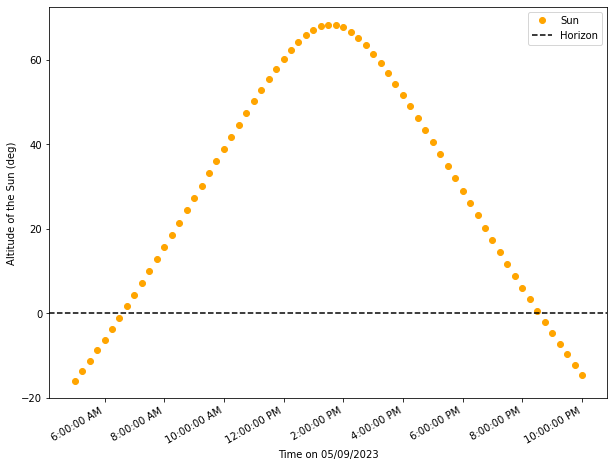

In [8]:
sun_radec_arr = coord.get_sun(time_arr)
aa_frame_arr = coord.AltAz(location=observing_location, obstime=time_arr)
sun_altaz_arr = sun_radec_arr.transform_to(aa_frame_arr)

plt.figure(figsize=(10,8))
plt.plot(local_time_arr.datetime,sun_altaz_arr.alt.deg,'o',color='orange',label="Sun")
plt.axhline(0,linestyle='--',color='k',label='Horizon')
plt.xlabel("Time on 05/09/2023")
plt.ylabel("Altitude of the Sun (deg)")
plt.gcf().autofmt_xdate()  # orient date labels at a slant
formatter = DateFormatter('%l:%M:%S %p')
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend()
plt.show()